# 1. Environment Setup

In [1]:
%pip install tensorflow matplotlib keras-tuner scikit-learn

     ---------------------------------------- 8.0/8.0 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 129.1/129.1 KB 2.5 MB/s eta 0:00:00
     -------------------------------------- 390.0/390.0 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 KB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 K

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\alexa\AppData\Local\Prog

## 1.1 Imports

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## 1.2 Data Splits and Normalization

In [7]:
# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


## 1.3 Plotting Function
A function we can call later on to visualize model performance.

In [8]:
def plot_performance(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [9]:
def evaluate_accuracy(model, x_test, y_test, model_name):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"{model_name} - Test Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

## 1.4 PCA

In [11]:
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [17]:
# Apply PCA
n_components = 100  # Number of principal components to retain
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

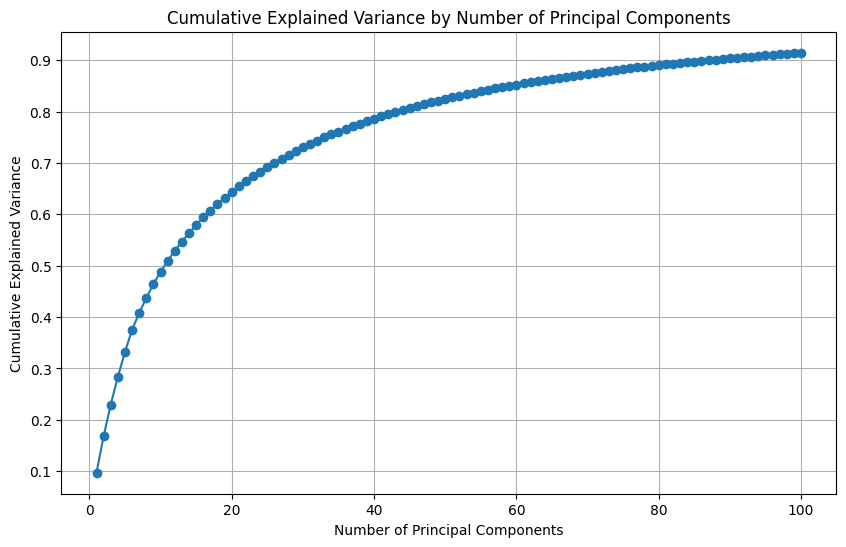

In [18]:
# Explained variance plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

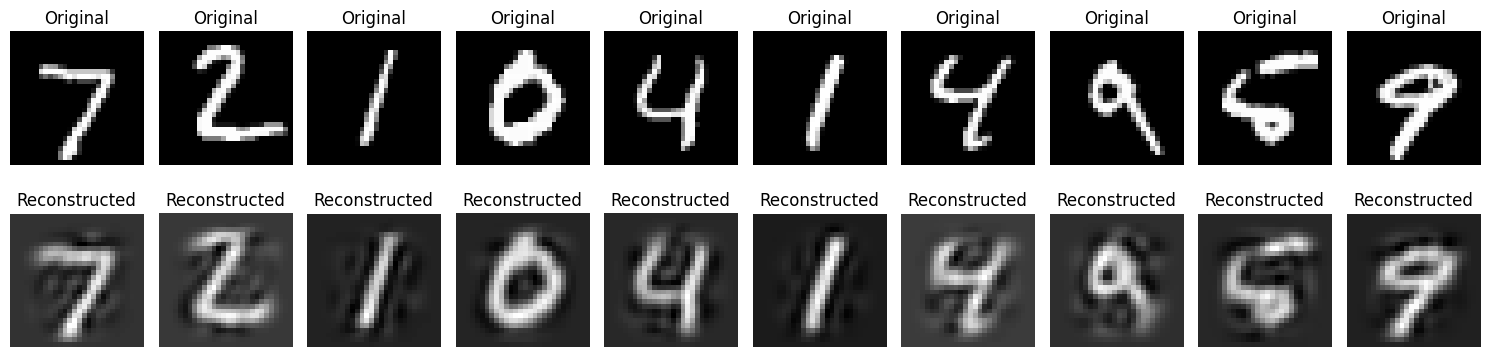

In [15]:
# Visualize reconstructed images from PCA
def plot_reconstructed_images(original, transformed, pca_model, num_images=10):
    """Reconstruct and plot the original and PCA-reconstructed images."""
    reconstructed = pca_model.inverse_transform(transformed)
    reconstructed_images = reconstructed.reshape(-1, 28, 28)

    fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(original[i], cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')
        # Reconstructed images
        axes[1, i].imshow(reconstructed_images[i], cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Plot original and reconstructed images
plot_reconstructed_images(x_test, x_test_pca, pca)

# 2. Base Model
In this first step, we create a basic CNN model with a few convolutional and pooling layers followed by dense layers. This will serve as our baseline, helping us understand the initial performance and identify any issues like overfitting or underfitting.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9062 - loss: 0.2985 - val_accuracy: 0.9836 - val_loss: 0.0470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9859 - loss: 0.0462 - val_accuracy: 0.9871 - val_loss: 0.0378
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9896 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9934 - loss: 0.0196 - val_accuracy: 0.9913 - val_loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9882 - val_loss: 0.0336


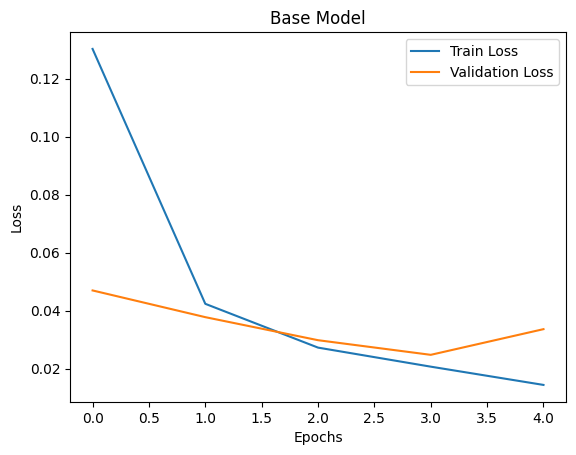

Base Model - Test Accuracy: 98.82%
0.9882000088691711


In [11]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

plot_performance(history, "Base Model")
print(evaluate_accuracy(model, x_test, y_test, "Base Model"))

# 3. Optimizations

# 3.1 Adding Dropout
After reviewing the initial results, if we observe overfitting (validation accuracy not improving or diverging), we add dropout layers to prevent the model from memorizing the training data. Dropout helps by randomly setting a fraction of input units to zero during training, making the model more robust.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8387 - loss: 0.5023 - val_accuracy: 0.9839 - val_loss: 0.0525
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9694 - loss: 0.0991 - val_accuracy: 0.9862 - val_loss: 0.0428
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9767 - loss: 0.0753 - val_accuracy: 0.9904 - val_loss: 0.0297
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9792 - loss: 0.0660 - val_accuracy: 0.9912 - val_loss: 0.0268
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9826 - loss: 0.0548 - val_accuracy: 0.9907 - val_loss: 0.0302


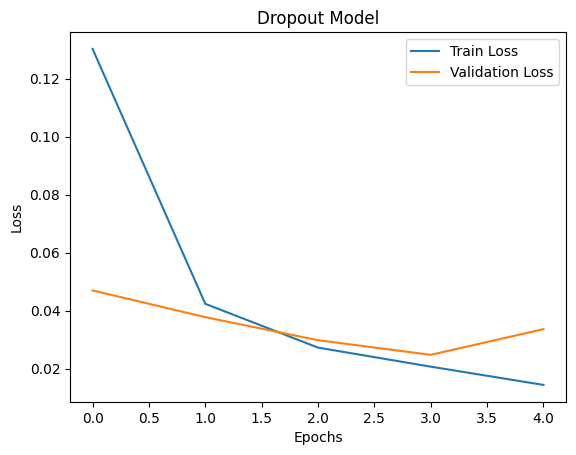

Dropout Model - Test Accuracy: 98.82%
0.9882000088691711


In [12]:
# Define a CNN model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Add dropout
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Add dropout
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout before output layer
    Dense(10, activation='softmax')
])

# Compile and train the model
model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

plot_performance(history, "Dropout Model")
print(evaluate_accuracy(model, x_test, y_test, "Dropout Model"))

## 3.2 Adding Batch Normalization
To further improve stability and training speed, we add batch normalization. This layer normalizes inputs to each layer, which helps in managing internal covariate shift and can improve training performance.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.8741 - loss: 0.4180 - val_accuracy: 0.9847 - val_loss: 0.0443
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9727 - loss: 0.0885 - val_accuracy: 0.9882 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9768 - loss: 0.0744 - val_accuracy: 0.9888 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9799 - loss: 0.0646 - val_accuracy: 0.9913 - val_loss: 0.0267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9835 - loss: 0.0548 - val_accuracy: 0.9910 - val_loss: 0.0268


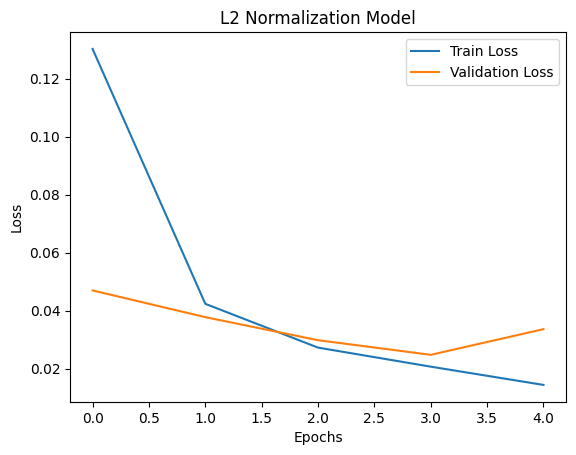

L2 Normalization Model - Test Accuracy: 98.82%
0.9882000088691711


In [13]:
# Define a CNN model with batch normalization
model_l2norm = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train the model
model_l2norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2norm = model_l2norm.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

plot_performance(history, "L2 Normalization Model")
print(evaluate_accuracy(model, x_test, y_test, "L2 Normalization Model"))

## 3.3: Hyperparameter Tuning
To further improve performance, we adjust the learning rate of the optimizer and increase the number of epochs for better convergence. Here, we'll try a slightly smaller learning rate.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8345 - loss: 0.5461 - val_accuracy: 0.9831 - val_loss: 0.0540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9662 - loss: 0.1111 - val_accuracy: 0.9871 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9756 - loss: 0.0792 - val_accuracy: 0.9888 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9790 - loss: 0.0668 - val_accuracy: 0.9909 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9822 - loss: 0.0589 - val_accuracy: 0.9886 - val_loss: 0.0354


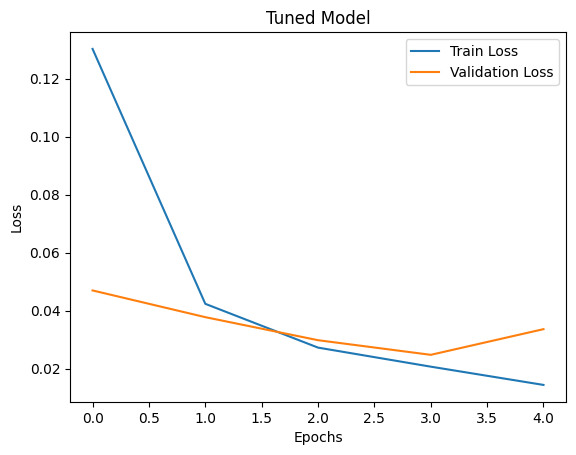

Tuned Model - Test Accuracy: 98.82%
0.9882000088691711


In [15]:
# Define a CNN model with batch normalization and a tuned learning rate
model_tuned = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train the model with a smaller learning rate
model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history_tuned = model_tuned.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

plot_performance(history, "Tuned Model")
print(evaluate_accuracy(model, x_test, y_test, "Tuned Model"))

## 3.4 Increase Epochs
Our performances are continuing to improve, we can increase the number of epochs to hopefully continue this.

## 3.5 Transfer learning
Transfer Learning applies pre-trained weights to a model. It can act as a "head start" - improving performance and reducing training times.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from kerastuner import Hyperband
import tensorflow as tf
import matplotlib.pyplot as plt

# Define a function to build the CNN model with hyperparameter tuning
def build_model(hp):
    model = Sequential()
    
    # First Conv2D layer
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Second Conv2D layer
    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Flatten and Dense layers
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', min_value=0.3, max_value=0.6, step=0.1)))
    
    # Output layer
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set up the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_tuning',
    project_name='mnist_cnn_tuning'
)

# Run the tuner search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
history_best = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the performance of the best model
def plot_performance(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_performance(history_best, "Best Tuned Model")

# Print final test accuracy
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Best Tuned Model - Test Accuracy: {test_accuracy * 100:.2f}%")

Trial 19 Complete [00h 04m 12s]
val_accuracy: 0.9937000274658203

Best val_accuracy So Far: 0.9940000176429749
Total elapsed time: 00h 51m 00s

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
64                |96                |conv_1_filters
3                 |5                 |conv_1_kernel
0.3               |0.3               |dropout_1
128               |192               |conv_2_filters
3                 |3                 |conv_2_kernel
0.4               |0.3               |dropout_2
256               |64                |dense_units
0.3               |0.5               |dropout_3
0.000174          |0.0016382         |learning_rate
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8463 - loss: 0.4876 - val_accuracy: 0.9

KeyboardInterrupt: 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9883 - loss: 0.0393 - val_accuracy: 0.9948 - val_loss: 0.0167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9902 - loss: 0.0340 - val_accuracy: 0.9938 - val_loss: 0.0189
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9910 - loss: 0.0304 - val_accuracy: 0.9925 - val_loss: 0.0212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9930 - val_loss: 0.0209


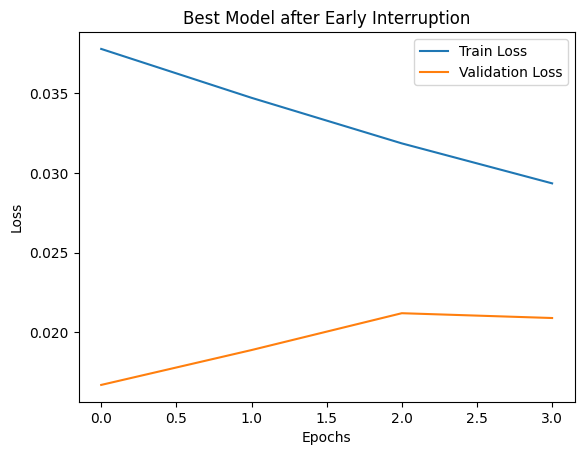

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9933 - loss: 0.0203
Best Model - Test Accuracy: 99.48%


In [18]:
# Interrupt the tuner search if desired and retrieve the best model so far
best_model = tuner.get_best_models(num_models=1)[0]

# Compile the best model if it hasn't been compiled already
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Optional: Use EarlyStopping callback if you want to prevent overfitting in the final training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Retrain the best model on the training data with early stopping
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plot performance for the best model
plot_performance(history, "Best Model after Early Interruption")

# Evaluate and print final test accuracy
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Best Model - Test Accuracy: {test_accuracy * 100:.2f}%")
